# Monte Carlo Shit


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tabula
from scipy.stats import norm

# 1. Obtención del valor de π por Monte Carlo

## CAMBIAR A CIRCULO DE 0,1

In [2]:
numRep = 1_000_000
x, y = np.random.random(numRep), np.random.random(numRep)

dentro = 0

for i in range(numRep):
    posicion = np.sqrt( (x[i]-0.5)**2 + (y[i]-0.5)**2 )
    if posicion <= 0.5:
        dentro += 1

estimacionPI = 4 * dentro/(numRep)
estimacionPI


3.142572

# 2. Potencia Disipada

In [3]:
def calcular_Potencia(V,R,a,t,t_0):
    return V**2 / (R * (1 + a * (t - t_0)) )

In [4]:
V_prom = 50.0
R_prom = 100.0
a_prom = 3.9*10**-3
t_prom = 30.5
t_0 = 20


V_u = 0.5
R_u = 1.0
a_u = 0.3*10**-3
t_u =2.5

N = 1_000_000


In [5]:
V = V_prom + V_u * np.random.normal(size=N)
R = R_prom + R_u * np.random.normal(size=N)
a = a_prom + a_u * np.random.normal(size=N)
t = t_prom + t_u * np.random.normal(size=N)

In [6]:
P = calcular_Potencia(V,R,a,t,t_0)

In [7]:
P.mean()
#P.std()

24.023513405184165

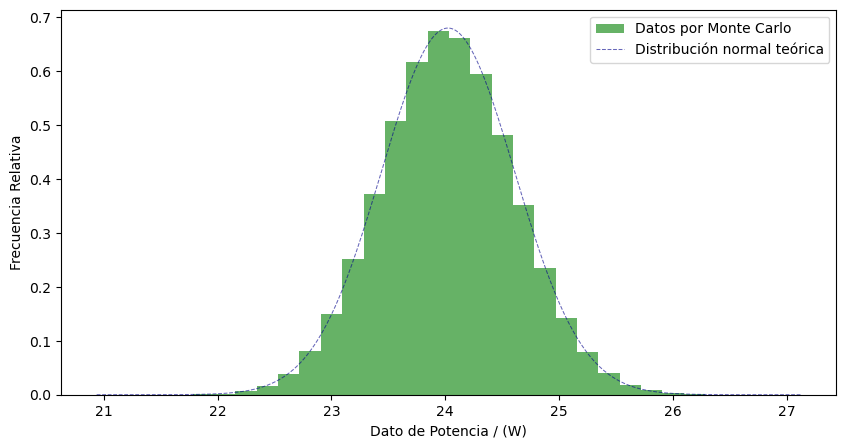

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(P,bins=30,density=True, alpha=0.6, color='g', label="Datos por Monte Carlo")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 500)

# Crear los valores y de la distribución normal
p = norm.pdf(x, P.mean(), P.std())

# Dibujar la distribución normal
plt.plot(x, p, linewidth=0.75, color="darkblue", alpha=0.6, linestyle="dashed", label="Distribución normal teórica")


plt.xlabel("Dato de Potencia / (W)")
plt.ylabel("Frecuencia Relativa")
plt.legend(loc="best")

In [9]:
P.sort()
limiteInf = round(N*(1-0.9545)/2)
limiteSup = N-limiteInf
datosInferiores = P[:limiteInf]
datosSuperiores = P[limiteSup:]

In [10]:
newP = (P[limiteSup] + P[limiteInf])/2
newP_U = (P[limiteSup] - P[limiteInf])/2

print(newP, newP_U)

24.038289568713616 1.1750383328223766


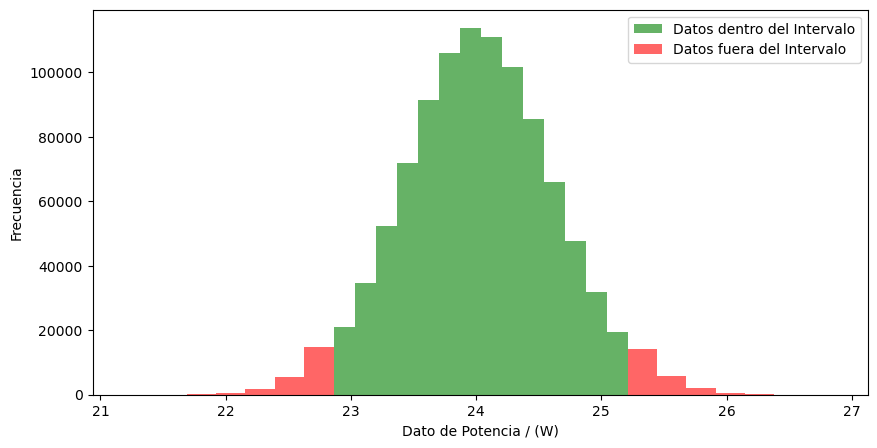

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(P[limiteInf:limiteSup], bins=14, alpha=0.6, color='g', label="Datos dentro del Intervalo")
plt.hist(datosInferiores, bins=7, alpha=0.6, color='r', label="Datos fuera del Intervalo")
plt.hist(datosSuperiores, bins=7, alpha=0.6, color='r')



plt.xlabel("Dato de Potencia / (W)")
plt.ylabel("Frecuencia")
plt.legend(loc="best")

# 3. Error de Coseno

$$
h = l \cdot \cos \beta
$$

$\beta$ -> Rectangular $\pm 4 \pi / 180$

$$
l = \bar{l} + \delta l_{rep} + \delta l_{PO}
$$

$\delta l_{rep}$ -> Normal 
$\delta l_{PO}$ -> Distrib rect $\pm 0.25$ mm


In [12]:
file = "../T4/Tarea No. 4 (I-2023).pdf"
df = tabula.read_pdf(file, pages='4',area=[211,190,420,417])[0][1:]
df["Indicación de la regla"] = df["Indicación de la regla"].replace(',', '.', regex=True)
df["Indicación de la regla"] = df["Indicación de la regla"].astype(float)
df

Got stderr: Jun 12, 2023 12:34:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Jun 12, 2023 12:34:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



,Número de medición,Indicación de la regla
1,1.0,904.0
2,2.0,905.5
3,3.0,905.0
4,4.0,905.5
5,5.0,905.0
6,6.0,905.5
7,7.0,904.5
8,8.0,904.5
9,9.0,905.0
10,10.0,905.0


In [13]:
L_prom = df.mean()[1]
L_std = df.std()[1]

In [14]:
N = 1_000_000 # Número de repeticiones


L_delta_rep = L_std * np.random.normal(size=N)              # Distribución Normal centrada en 0 y desviación estándar de los datos de las mediciones
L_delta_res = -0.5 + 1 * np.random.uniform(size=N)      # Distribución Rectangular centrada en 0 y límites -0.5 a +0.5
L_delta_pos0 = -0.25 + 0.5 * np.random.uniform(size=N)      # Distribución Rectangular centrada en 0 y límites -0.25 a +0.25

L = L_prom + L_delta_rep + L_delta_res + L_delta_pos0



In [15]:
angulo = np.pi / 45
beta = angulo * np.random.uniform(size=N) # Distribución Rectangular de límites de 0 a pi/45
#beta = -angulo + 2 *angulo * np.random.uniform(size=N) # Distribución Rectangular de límites de -pi/45 a pi/45

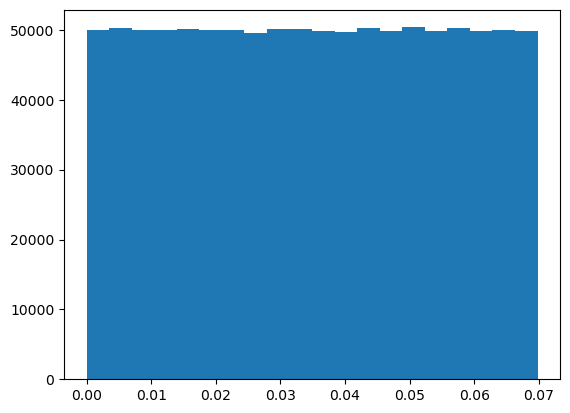

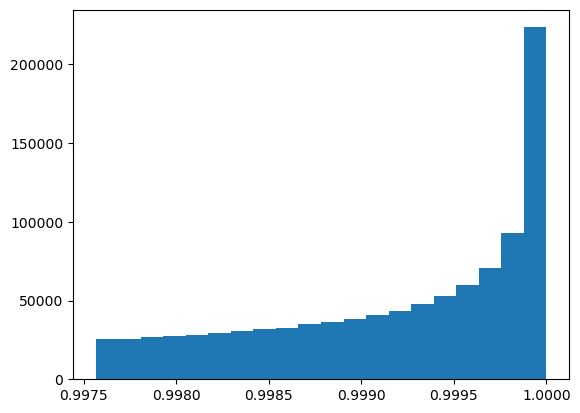

In [19]:
plt.hist(beta, bins=20)
plt.show()
plt.hist(np.cos(beta), bins=20)
plt.show()

In [93]:
h = L *np.cos(beta)
h.mean()
h.std()

0.8584849768231324

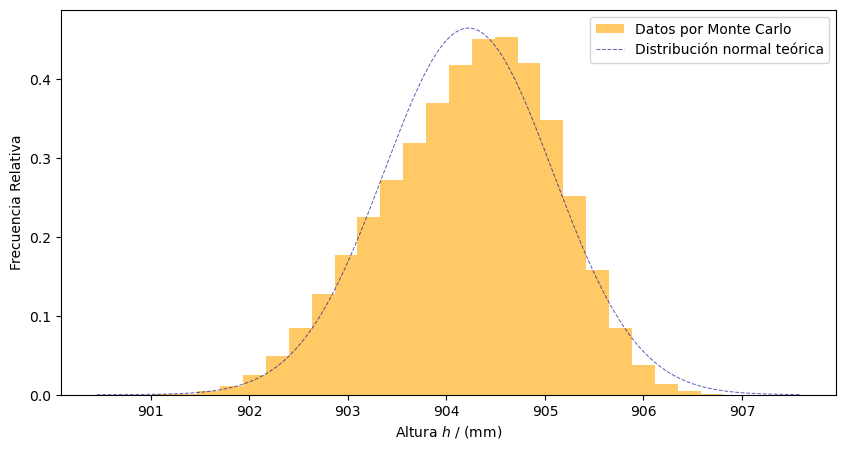

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(h, bins=28, density=True, alpha=0.6, color='orange', label="Datos por Monte Carlo")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 500)

# Crear los valores y de la distribución normal
p = norm.pdf(x, h.mean(), h.std())

# Dibujar la distribución normal
plt.plot(x, p, linewidth=0.75, color="darkblue", alpha=0.6, linestyle="dashed", label="Distribución normal teórica")


plt.xlabel("Altura $h$ / (mm)")
plt.ylabel("Frecuencia Relativa")
plt.legend(loc="best")

### Inciso b

Intervalo de Confianza:  905.7520260424994  ,  902.4205202716859
Media:  904.0862731570926
Incertidumbre Expandida 95,45% :  1.6657528854067891


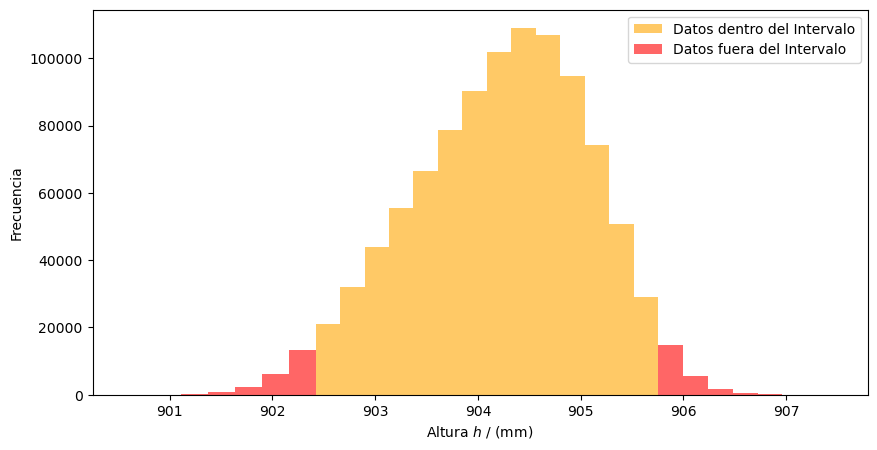

In [97]:
h.sort()
limiteInf = round(N*(1-0.9545)/2)
limiteSup = N-limiteInf
datosInferiores = h[:limiteInf]
datosSuperiores = h[limiteSup:]

print("Intervalo de Confianza: ",h[limiteSup], " , ", h[limiteInf])
new = (h[limiteSup] + h[limiteInf])/2
new_U = (h[limiteSup] - h[limiteInf])/2

print("Media: ", new)
print("Incertidumbre Expandida 95,45% : ", new_U)


fig, ax = plt.subplots(figsize=(10,5))
plt.hist(h[limiteInf:limiteSup], bins=14, alpha=0.6, color='orange', label="Datos dentro del Intervalo")
plt.hist(datosInferiores, bins=7, alpha=0.6, color='r', label="Datos fuera del Intervalo")
plt.hist(datosSuperiores, bins=7, alpha=0.6, color='r')



plt.xlabel("Altura $h$ / (mm)")
plt.ylabel("Frecuencia")
plt.legend(loc="best")

# 4. Incertidumbres por el método de Montecarlo

No necesariamente el valor esperado está en el centro. Usar intervalo de confianza. Promedio queda sesgado. Se da un valor esperado e intervalo de confianza. Explicar.

$$
y = x_1 +x_2 +x_3 +x_4
$$


##### $X_1 $ Exponencial de $\chi = 0.5$ 



##### $X_2 $ Gamma de $q = 2$


##### $X_3 $


##### $X_4 $

In [118]:
x_1 = -0.5 * np.log( np.random.random(size=N) )

x_2 = np.random.gamma(2, size=N)

x_2_alt = []

for n in range(N):
    productoria = 1
    for  i in range(2+1):
        productoria = productoria * np.random.random()
    x_2_alt.append(- np.log(productoria))
x_2_alt = np.asarray(x_2_alt)


x_3 = 3/2 + (np.sin(2*np.pi*np.random.random(size=N) ))/2

as_4 = (1-0.05) + 2*0.05*np.random.random(size=N)
bs_4 = 3 - as_4
x_4 = as_4 + (bs_4 - as_4)*np.random.random(size=N)

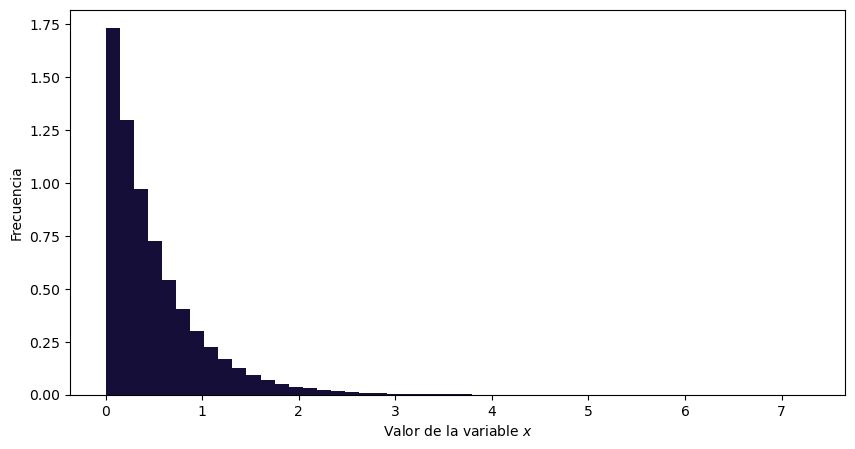

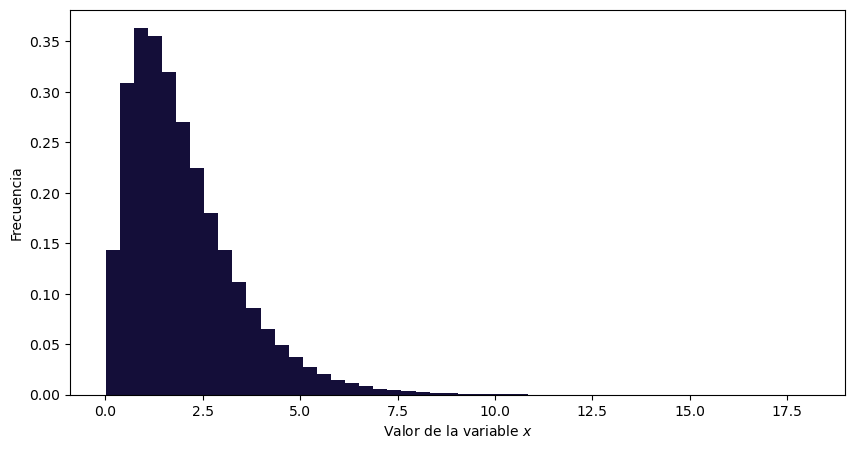

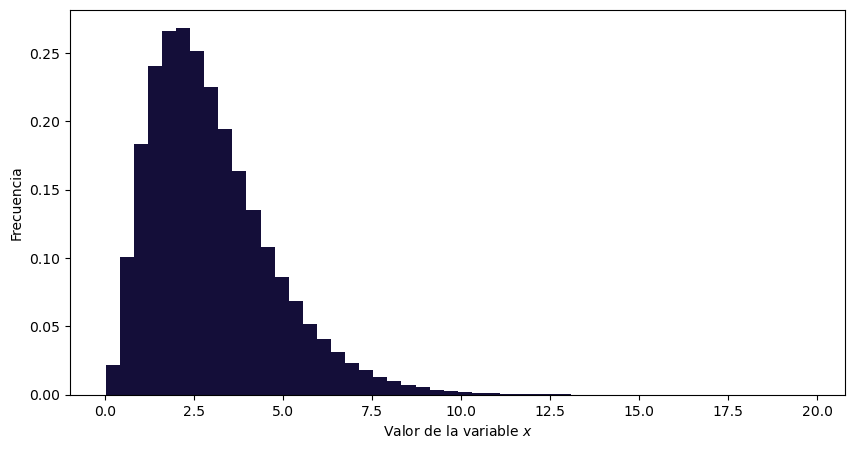

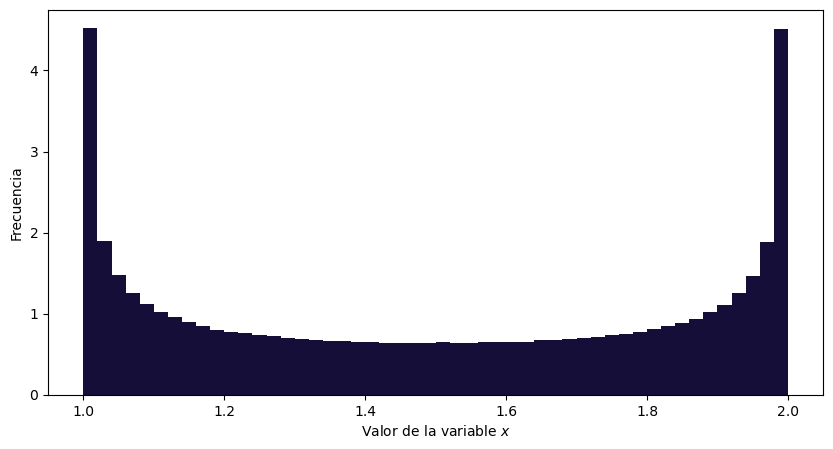

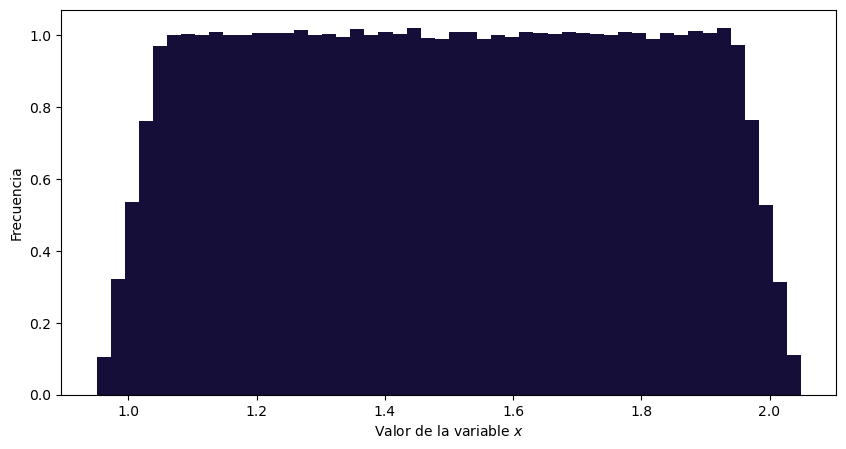

In [119]:

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x_1,bins=50, density=True, color="#140e39")
plt.xlabel("Valor de la variable $x$")
plt.ylabel("Frecuencia")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x_2,bins=50, density=True, color="#140e39")
plt.xlabel("Valor de la variable $x$")
plt.ylabel("Frecuencia")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x_2_alt,bins=50, density=True, color="#140e39")
plt.xlabel("Valor de la variable $x$")
plt.ylabel("Frecuencia")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x_3,bins=50, density=True, color="#140e39")
plt.xlabel("Valor de la variable $x$")
plt.ylabel("Frecuencia")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x_4,bins=50, density=True, color="#140e39")
plt.xlabel("Valor de la variable $x$")
plt.ylabel("Frecuencia")
plt.show()

$x_2$ NO SIRVE

In [131]:

y = x_1 + x_2_alt + x_3 +x_4

In [132]:
print("Media: ", y.mean())
print("Mediana: ", np.median(y))
print("Desvest: ", y.std())

Media:  6.499213242832669
Mediana:  6.209974318428179
Desvest:  1.8607395775716808


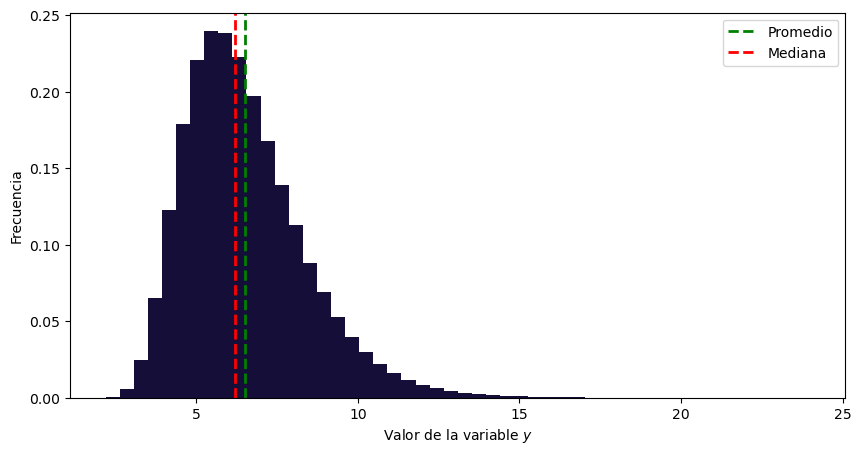

In [136]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(y,bins=50, density=True, color="#140e39")
plt.axvline( y.mean(), color='g', linestyle='dashed', linewidth=2, label='Promedio')
plt.axvline(np.median(y), color='red', linestyle='dashed', linewidth=2, label='Mediana')
plt.xlabel("Valor de la variable $y$")
plt.ylabel("Frecuencia")
plt.legend(loc="best")
plt.show()

Intervalo de Confianza:  11.036230558253342  ,  3.678975307640278
Media:  7.35760293294681
Incertidumbre Expandida 95,45% :  3.678627625306532


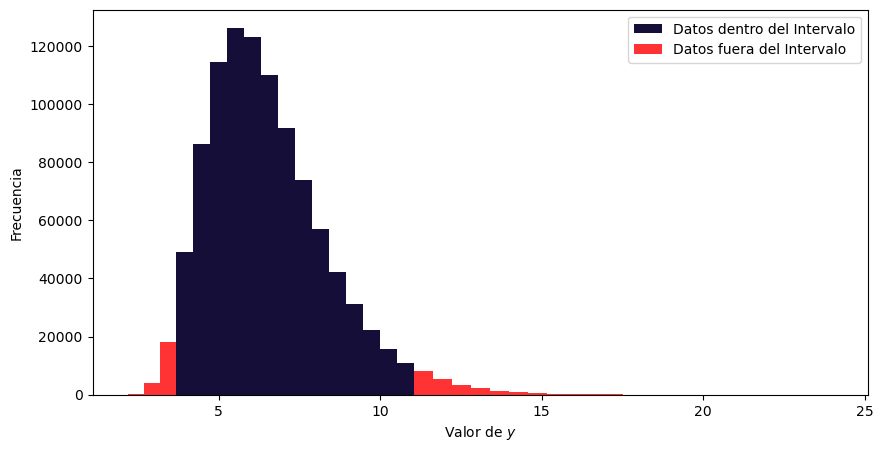

In [151]:
y.sort()
limiteInf = round(N*(1-0.9545)/2)
limiteSup = N-limiteInf
datosInferiores = y[:limiteInf]
datosSuperiores = y[limiteSup:]

print("Intervalo de Confianza: ",y[limiteSup], " , ", y[limiteInf])
new = (y[limiteSup] + y[limiteInf])/2
new_U = (y[limiteSup] - y[limiteInf])/2

print("Media: ", new)
print("Incertidumbre Expandida 95,45% : ", new_U)


fig, ax = plt.subplots(figsize=(10,5))
plt.hist(y[limiteInf:limiteSup], bins=14, color='#140e39', label="Datos dentro del Intervalo")
plt.hist(datosInferiores, bins=3, alpha=0.8, color='r', label="Datos fuera del Intervalo")
plt.hist(datosSuperiores, bins=22, alpha=0.8, color='r')



plt.xlabel("Valor de $y$")
plt.ylabel("Frecuencia")
plt.legend(loc="best")

# 5. Extra
